In [1]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import OzESI_CLAW

import re
from sklearn.mixture import GaussianMixture
import tqdm

import OzESI_CLAW
# import OzESI
# import OzESI_plot
# import OzESI_compare




#version 2
import OzESI
from OzESI_plot import Plot
# Import the create_folder function from OzESI_utils
from OzESI_utils import create_folder, create_base_directory, generate_filename, save_for_ozone_compare, create_project_folder, filter_o3mzml_files, create_all_folders
from OzESI_compare import OzoneCompare


# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
name_of_project = 'AMP'


In [2]:
# Define the mode: 'ON' or 'OFF'
mode = 'ON'  # Change to 'ON' as needed

# Set default values based on the mode
if mode == 'ON':
    data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/AMP_ON/'
    Project_results = f'{Project}{Project_Name}/results/AMP/'
    file_name_to_save = 'AMP'
    tolerance = 0.3
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
    project_results_directory = f'Projects/{Project_Name}/results/AMP/'
    save_df_name = 'AMP_ON.csv'
    plots_directory = f'Projects/{Project_Name}/results/AMP/plots/on/'
    file_name = 'AMP_ON.csv'

#Updated_Lipid_Data.xlsx
#AMP_Database_OzOFF
else:
    data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/AMP_OFF/'
    Project_results = f'{Project}{Project_Name}/results/AMP/'
    file_name_to_save = 'AMP'
    tolerance = 0.8
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
    project_results_directory = f'Projects/{Project_Name}/results/AMP/'
    save_df_name = 'AMP_OFF.csv'
    plots_directory = f'Projects/{Project_Name}/results/AMP/plots/off/'
    file_name = 'AMP_OFF.csv'



# Define all necessary folder paths
folders_to_create = [
    csv_data_folder,
    base_plot_directory,
    project_results_directory,
    plots_directory
]

# Call the function to ensure all folders exist
create_all_folders(*folders_to_create)

#mzML Parse
mzml_parse_csv = f'{csv_data_folder}{file_name_to_save}_mzml_parse_{mode}.csv'

# Save RawDataParser output CSV file
raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{mode}.csv"

# Paths to the CSV files
mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'


# # Path to OzoneCompare files
# ozone_compare_csv = f"{csv_data_folder}{file_name_to_save}_OzoneCompared.csv"


# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv_on = f"{file_name_to_save}_PeakAnalysis_ON_test.csv"
peak_analysis_csv_off = f"{file_name_to_save}_PeakAnalysis_OFF_test.csv"
ozone_compare_csv = f'{file_name_to_save}_OzoneCompared_test.csv'

# path file for the mzml files


Folder already exists: ./Projects/AMP/results/AMP/csv_data/
Folder already exists: Projects/AMP/results/plots/on/
Folder already exists: Projects/AMP/results/AMP/
Folder already exists: Projects/AMP/results/AMP/plots/on/
data_base_name_location: lipid_database/AMP_Database_OzON.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/AMP_ON/
Project_results: ./Projects/AMP/results/AMP/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


In [3]:
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD259', 'FAD257', 'FAD263', 'FAD249', 'FAD246', 'FAD245'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

# FIX CLAW MATCHING SCRIPT TO WORK FOR OZON

In [4]:
#Import all the necessary libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import re
import plotly.express as px
from collections import defaultdict
import plotly.io as pio
import json
import plotly.graph_objs as go
import matplotlib.colors as mcolors
import json
import ipywidgets as widgets
import warnings
import time
import shutil




def create_analysis_dataframes():
    """
    Creates and returns three DataFrames for storing time-intensity data, master data, and OzESI time data.

    Returns:
        pd.DataFrame: DataFrame for storing time and intensity values.
        pd.DataFrame: Master DataFrame for storing parent ion, product ion, intensity, transition, and sample ID.
        pd.DataFrame: DataFrame for storing OzESI (OzID Electron Spray Ionization) data including parent ion, product ion, retention time, intensity, sample ID, and transition.
    """
    time_intensity_dataframe = pd.DataFrame(columns=['Time', 'Intensity'])
    master_lipid_dataframe = pd.DataFrame(columns=['Parent_Ion', 'Product_Ion', 'Intensity', 'Transition', 'Sample_ID'])
    OzESI_time_dataframe = pd.DataFrame(columns=['Parent_Ion', 'Product_Ion', 'Retention_Time', 'OzESI_Intensity', 'Sample_ID', 'Transition'])
    
    return time_intensity_dataframe, master_lipid_dataframe, OzESI_time_dataframe




def pre_parsing_setup(data_base_name_location, Project, Project_Name, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data):
    """
    A function to setup and check for the necessary project directories. 
    It also prints and returns the received configurations. 

    :param data_base_name_location: The path of the database name location.
    :param Project: The project path.
    :param Project_Name: The name of the project.
    :param Project_Folder_data: The project data folder path.
    :param Project_results: The path where project results are stored.
    :param file_name_to_save: The name of the file where data is to be saved.
    :param tolerance: The accepted tolerance level.
    :param remove_std: A boolean indicating whether or not to remove standard deviations.
    :param save_data: A boolean indicating whether or not to save the data.

    :return: The given configurations as a dictionary.
    """

    # Check and create folders if they do not exist
    os.makedirs(os.path.dirname(data_base_name_location), exist_ok=True)
    os.makedirs(Project, exist_ok=True)
    os.makedirs(Project_Folder_data, exist_ok=True)
    os.makedirs(Project_results, exist_ok=True)

    # Return all configurations as a dictionary
    configs = {
        "data_base_name_location": data_base_name_location,
        "Project": Project,
        "Project_Name": Project_Name,
        "Project_Folder_data": Project_Folder_data,
        "Project_results": Project_results,
        "file_name_to_save": file_name_to_save,
        "tolerance": tolerance,
        "remove_std": remove_std,
        "save_data": save_data
    }
    for key, value in configs.items():
        print(f"{key}: {value}")
    return data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data





def create_ion_dict(mrm_database):
    """
    Creates a dictionary of ions from an MRM database DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    
    :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
    """
    ion_dict = defaultdict(list)
    for index, row in mrm_database.iterrows():
        ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
    return ion_dict



# Declare the DataFrame globally if it's used across multiple functions
time_and_intensity_df = pd.DataFrame(columns=['Time', 'Intensity'])
master_df = pd.DataFrame(columns=['Parent_Ion', 'Product_Ion', 'Intensity', 'Transition', 'Sample_ID'])
OzESI_time_df = pd.DataFrame(columns=['Lipid','Parent_Ion', 'Product_Ion', 'Retention_Time', 'OzESI_Intensity', 'Sample_ID', 'Transition'])

def mzml_parser(file_path, plot_chromatogram=False):
    global master_df
    global OzESI_time_df
    global time_and_intensity_df
    
    rows = []
    ozesi_rows = []
    
    run = pymzml.run.Reader(file_path, skip_chromatogram=False)
    q1_mz = 0
    q3_mz = 0

    for spectrum in run:
        for element in spectrum.ID.split(' '):
            if 'Q1' in element:
                q1 = element.split('=')
                q1_mz = np.round(float(q1[1]), 1)

            if 'Q3' in element:
                q3 = element.split('=')
                q3_mz = np.round(float(q3[1]), 1)

                # ##############
                # # Plotting chromatogram if the condition is met and plot_chromatogram is True
                # if plot_chromatogram and within_tolerance(q1_mz, 876.6) and within_tolerance(q3_mz, 577.6):
                #     times, intensities = zip(*spectrum.peaks())
                #     plt.plot(times, intensities)
                #     plt.xlabel('Time')
                #     plt.ylabel('Intensity')
                #     plt.title('Chromatogram for 876.6 -> 577.6')
                #     plt.show()
                # ###########

                intensity_store = np.array([intensity for _, intensity in spectrum.peaks()])
                intensity_sum = np.sum(intensity_store)
                
                transition = f"{q1_mz} -> {q3_mz}"
                sample_id = os.path.basename(file_path)[:-5]
                
                rows.append({
                    'Parent_Ion': q1_mz,
                    'Product_Ion': q3_mz,
                    'Intensity': intensity_sum,
                    'Transition': transition,
                    'Sample_ID': sample_id
                })
                
                for time, intensity in spectrum.peaks():
                    ozesi_rows.append({
                        'Parent_Ion': q1_mz,
                        'Product_Ion': q3_mz,
                        'Retention_Time': time,
                        'OzESI_Intensity': intensity,
                        'Sample_ID': sample_id,
                        'Transition': transition
                    })
                           
    df = pd.DataFrame(rows)
    # OzESI_time_df = pd.DataFrame(ozesi_rows)
    # Append the new rows to the existing global OzESI_time_df
    OzESI_time_df = OzESI_time_df.append(pd.DataFrame(ozesi_rows), ignore_index=True)
    master_df = master_df.append(df, ignore_index=True)
    print(f'Finished parsing mzML file: {file_path}\n')


def mzml_parser_batch(folder_name, plot_chromatogram=False):
    global master_df
    global time_and_intensity_df
    
    data_folder = os.listdir(folder_name)
    data_folder.sort()

    for file in data_folder:
        if file.endswith('.mzML'):
            file_path = os.path.join(folder_name, file)
            mzml_parser(file_path, plot_chromatogram=plot_chromatogram)  # Pass the flag here
    
    print('Finished parsing all mzML files\n')



def within_tolerance(a, b, tolerance=0.3):
    """
    Checks if the absolute difference between two values is within a given tolerance.
    
    :param a: First value to compare.
    :param b: Second value to compare.
    :param tolerance: The acceptable difference between the two values. Defaults to 0.3.
    
    :return: Boolean indicating whether the difference is within the given tolerance.
    """
    return abs(a - b) <= tolerance


def match_ions(row, ion_dict, tolerance=0.3):
    """
    Matches the ions in a DataFrame row with the ions in an ion dictionary.
    
    :param row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.
    :param ion_dict: A dictionary of ion pairs and their corresponding lipid and class information.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: The original row updated with matched lipid and class information if matches were found.
    """
    ions = (row['Parent_Ion'], row['Product_Ion'])
    matched_lipids = []
    matched_classes = []

    for key, value in ion_dict.items():
        if within_tolerance(ions[0], key[0], tolerance) and within_tolerance(ions[1], key[1], tolerance):
            matched_lipids.extend([match[0] for match in value])
            matched_classes.extend([match[1] for match in value])

    if matched_lipids and matched_classes:
        row['Lipid'] = ' | '.join(matched_lipids)
        row['Class'] = ' | '.join(matched_classes)

    return row


def match_lipids_parser(mrm_database, df, tolerance=0.3):
    """
    Performs lipid matching by creating an ion dictionary from the MRM database and applying the match_ions function to each row of a DataFrame.
    
    :param mrm_database: DataFrame containing MRM database information.
    :param df: DataFrame containing ion information to be matched.
    :param tolerance: The acceptable difference between ion values to be considered a match. Defaults to 0.3.
    
    :return: DataFrame with matched lipid and class information if matches were found.
    """
    ion_dict = create_ion_dict(mrm_database)
    df_matched = df.apply(lambda row: match_ions(row, ion_dict=ion_dict, tolerance=tolerance), axis=1)
    return df_matched



def save_dataframe(df, Project_results, file_name_to_save, max_attempts=5):
    """
    Saves a given DataFrame to a CSV file within a specified directory.
    
    :param df: DataFrame to be saved.
    :param Project_results: The project directory to save results in.
    :param file_name_to_save: The desired filename for the saved DataFrame.
    :param max_attempts: The maximum number of attempts to save the DataFrame. Defaults to 5.
    
    :return: None
    """
    folder_path = f'data_results/data/data_matching/{Project_results}'
    os.makedirs(folder_path, exist_ok=True)

    for i in range(max_attempts):
        file_path = f'{folder_path}/{file_name_to_save}.csv'
        if not os.path.isfile(file_path):
            df.to_csv(file_path, index=False)
            print(f"Saved DataFrame to {file_path}")
            break
    else:
        print(f"Failed to save DataFrame after {max_attempts} attempts.")
        return None



def full_parse(data_base_name_location, 
               Project_Folder_data, 
               Project_results, 
               file_name_to_save, 
               tolerance, 
               remove_std=True, 
               save_data=False, 
               batch_processing=True,
               plot_chromatogram=False):
    """
    Performs the complete parsing and data matching process for given inputs.
    
    :param data_base_name_location: Location of the MRM database file to be read.
    :param Project_Folder_data: The project folder containing data to be parsed (folder path or single file path).
    :param Project_results: The project directory to save results in.
    :param file_name_to_save: The desired filename for the saved DataFrame.
    :param tolerance: The acceptable difference between ion values to be considered a match.
    :param remove_std: A flag to indicate whether standard lipid classes should be removed. Defaults to True.
    :param save_data: A flag to indicate whether the matched data should be saved. Defaults to False.
    :param batch_processing: A flag to indicate whether to process a batch of files (directory) or a single file. Defaults to True.
    
    :return: Tuple containing matched DataFrame and OzESI DataFrame.
    """
    global master_df
    mrm_database = read_mrm_list(data_base_name_location, remove_std=remove_std)
    
    # Batch processing
    if batch_processing:
        mzml_parser_batch(Project_Folder_data, plot_chromatogram=plot_chromatogram)  
    # Single file processing
    else:
        mzml_parser(Project_Folder_data, plot_chromatogram=plot_chromatogram) 
    
    df_matched = match_lipids_parser(mrm_database, master_df, tolerance=tolerance)
    
    if save_data:
        save_dataframe(df_matched, Project_results, file_name_to_save)

    return df_matched, OzESI_time_df


def filter_rt(df, min_rt=10.0, max_rt=20.0, min_intensity=None):
    """
    Filters the DataFrame based on retention times and aggregates by max intensity for unique 'Sample_ID' and 'Transition' combinations.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with columns 'Retention_Time' and 'OzESI_Intensity'.
        min_rt (float, optional): Minimum retention time for filtering. Defaults to 10.0.
        max_rt (float, optional): Maximum retention time for filtering. Defaults to 20.0.
        min_intensity (float, optional): Minimum intensity for filtering. If None, no filtering by intensity is done.
        
    Returns:
        pd.DataFrame: Filtered and aggregated DataFrame.
    """
    # Filter based on retention time
    filtered_df = df[(df['Retention_Time'] >= min_rt) & (df['Retention_Time'] <= max_rt)].copy()

    # Filter based on intensity if min_intensity is provided
    if min_intensity is not None:
        filtered_df = filtered_df[filtered_df['OzESI_Intensity'] >= min_intensity]

    # Round the values
    filtered_df['Retention_Time'] = filtered_df['Retention_Time'].round(2)
    filtered_df['OzESI_Intensity'] = filtered_df['OzESI_Intensity'].round(0)

    # Aggregate by max intensity for unique combinations of 'Sample_ID' and 'Transition'
    filtered_df = filtered_df.groupby(['Sample_ID', 'Transition']).apply(
        lambda x: x.loc[x['OzESI_Intensity'].idxmax()]).reset_index(drop=True)

    return filtered_df


def concat_dataframes(df_matched, filtered_df):
    """
    Concatenates two DataFrames along the columns.
    
    Parameters:
        df_matched (pd.DataFrame): First DataFrame.
        filtered_df (pd.DataFrame): Second DataFrame, only the 'Retention_Time' and 'OzESI_Intensity' columns will be used.
        
    Returns:
        pd.DataFrame: Concatenated DataFrame.
    """
    return pd.concat([df_matched, filtered_df[['Retention_Time', 'OzESI_Intensity']]], axis=1)

#### old DB way will be using new DBs to match
# def calculate_DB_Position(df_matched_ions, db_pos_list=[7,9,12]):
#     """
#     Creates a new DataFrame to store the DB_Position and Aldehyde_Ion values,
#     and calculate n-i values for the given db_pos_list.
    
#     Parameters:
#         df_matched_ions (pd.DataFrame): Input DataFrame containing matched ions.
#         db_pos_list (list): List of OzESI positions to calculate n-i values.
        
#     Returns:
#         pd.DataFrame: Modified DataFrame with new calculated columns for n-i values.
#     """
#     # Create a DataFrame to store the DB_Position and corresponding Aldehyde_Ion values
#     df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

#     # Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
#     for position in range(3, 21):
#         df_DB_aldehyde.loc[position, 'DB_Position'] = position
#         df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

#     # Loop through the specified db_pos_list
#     for ozesi_position in db_pos_list:
#         # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
#         aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

#         # Calculate and store the n-i value for the current OzESI position
#         df_matched_ions["n-{}".format(ozesi_position)] = df_matched_ions["Parent_Ion"] - aldehyde_ion

#     return df_matched_ions


## maybe dont need?
# def add_lipid_info(matched_dataframe, db_pos, tolerance=0.3):
#     """
#     Adds lipid information to the data frame based on matched ions within a certain tolerance.

#     :param matched_dataframe: DataFrame containing matched lipids and ion data.
#     :param db_pos: List of integer values representing the positions in the OzESI list to be checked.
#     :param tolerance: The acceptable difference between ion values to be considered a match.

#     :return: Updated DataFrame with added lipid information.
#     """
#     working_dataframe = matched_dataframe.copy()  # Create a copy for processing
#     final_dataframe = matched_dataframe.copy()    # Create a copy for final output

#     # Convert respective column values to float for given db_pos
#     for position in db_pos:
#         working_dataframe['n-' + str(position)] = working_dataframe['n-' + str(position)].astype(float)

#     # Iterate over the rows of the DataFrame to match lipids
#     for i in range(len(working_dataframe)):
#         if pd.isna(working_dataframe.loc[i, 'Lipid']):
#             parent_ion = working_dataframe.loc[i, 'Parent_Ion']

#             # Look for matching ions within tolerance
#             for j in range(len(working_dataframe)):
#                 current_row = working_dataframe.loc[j].copy()

#                 # If the parent ion is within tolerance and the Lipid column is a string
#                 for n in db_pos:
#                     if within_tolerance(parent_ion, current_row[f'n-{n}'], tolerance) and isinstance(current_row['Lipid'], str):
#                         working_dataframe.loc[i, 'Lipid'] = current_row['Lipid']
#                         working_dataframe.loc[i, 'db_pos'] = f'n-{n}' + current_row['db_pos']

#                         # Append to the final_dataframe
#                         appended_row = working_dataframe.loc[i].copy()
#                         appended_row['db_pos'] = f'n-{n}' + current_row['db_pos']
#                         final_dataframe = final_dataframe.append(appended_row, ignore_index=True)

#     # Drop rows in the final_dataframe where 'Lipid' column value is NaN
#     final_dataframe.dropna(subset=['Lipid'], inplace=True)

#     return final_dataframe


# dont need
# def calculate_intensity_ratio(df):
#     """
#     Calculates the intensity ratio for each lipid in the DataFrame, based on their 'OzESI_Intensity'.

#     :param df: DataFrame containing lipid information and intensity values.
#     :return: Updated DataFrame with added 'ratio' column.
#     """
#     # Create a new column for ratio
#     df['Ratio'] = pd.Series(dtype='float64')

#     # Iterate through each row in the DataFrame
#     for index, row in df.iterrows():
#         lipid = row['Lipid']
#         label = row['db_pos']
#         intensity = row['OzESI_Intensity']
#         sample_id = row['Sample_ID']

#         # Check if the label is n-9
#         if label == 'n-9':
#             # Find the corresponding row with n-7 label and same lipid name and Sample_ID
#             n7_row = df[(df['Lipid'] == lipid) & (df['db_pos'] == 'n-7')& (df['Sample_ID'] == sample_id)]

#             # If a matching row is found, calculate the intensity ratio
#             if not n7_row.empty:
#                 n7_intensity = n7_row['OzESI_Intensity'].values[0]
#                 ratio = intensity / n7_intensity

#                 # Assign the ratio to the 'ratio' column
#                 df.at[index, 'Ratio'] = ratio

#     return df


# probably dont need
# def sort_by_second_tg(lipid):
#     """
#     Helper function that sorts lipid names by second triglyceride, if present.

#     :param lipid: string of lipid names.
#     :return: Second triglyceride if present, else returns original lipid.
#     """
#     if pd.isna(lipid):
#         return lipid
#     tgs = lipid.split(',')
#     if len(tgs) > 1:
#         return tgs[1]
#     else:
#         return lipid


# dont need
# def filter_highest_ratio(df):
#     """
#     Filters the DataFrame to keep only rows with the highest ratio value for each unique Sample_ID and lipid.

#     :param df: DataFrame containing lipid information and intensity ratio.
#     :return: Filtered DataFrame.
#     """
#     # Sort the DataFrame by ratio in descending order
#     df_sorted = df.sort_values(by='Ratio', ascending=False)

#     # Drop duplicates keeping the first occurrence (highest ratio)
#     df_filtered = df_sorted.drop_duplicates(subset=['Sample_ID', 'Lipid','db_pos'], keep='first')
#     df_filtered = df_filtered.sort_values(by=['Sample_ID', 'Lipid'], ascending=[True, True])

#     return df_filtered




### TEST NEW MZML PARSER

In [53]:
import pandas as pd
import numpy as np
import os
import pymzml

class MzMLParser:
    def __init__(self):
        # Initialize DataFrames to store parsed data
        self.transition_summed_df = pd.DataFrame(columns=[
            'Parent_Ion', 
            'Product_Ion', 
            'Intensity', 
            'Transition', 
            'Sample_ID'
        ])
        self.OzESI_df = pd.DataFrame(columns=[
            'Lipid',
            'Parent_Ion', 
            'Product_Ion', 
            'Retention_Time', 
            'OzESI_Intensity', 
            'Sample_ID', 
            'Transition'
        ])
        self.time_and_intensity_df = pd.DataFrame(columns=['Time', 'Intensity'])

    def mzml_parser(self, file_path, plot_chromatogram=False):
        """
        Parses a single mzML file and updates the DataFrames with parsed data.

        Parameters:
        file_path (str): The path to the mzML file to be parsed.
        plot_chromatogram (bool): Flag to indicate whether to plot the chromatogram (default is False).
        """
        rows = []
        ozesi_rows = []

        # Read the mzML file using pymzml
        run = pymzml.run.Reader(file_path, skip_chromatogram=False)
        q1_mz = 0  # Initialize Q1 mass-to-charge ratio
        q3_mz = 0  # Initialize Q3 mass-to-charge ratio

        # Iterate through each spectrum in the mzML file
        for spectrum in run:
            # Extract Q1 and Q3 values from the spectrum ID
            for element in spectrum.ID.split(' '):
                if 'Q1' in element:
                    q1 = element.split('=')
                    q1_mz = np.round(float(q1[1]), 1)

                if 'Q3' in element:
                    q3 = element.split('=')
                    q3_mz = np.round(float(q3[1]), 1)

                    # Calculate the sum of intensities for the peaks in the spectrum
                    intensity_store = np.array([intensity for _, intensity in spectrum.peaks()])
                    intensity_sum = np.sum(intensity_store)

                    # Construct the transition string
                    transition = f"{q1_mz} -> {q3_mz}"
                    # Extract sample ID from the file name
                    sample_id = os.path.basename(file_path)[:-5]

                    # Append parsed data to the rows list
                    rows.append({
                        'Parent_Ion': q1_mz,
                        'Product_Ion': q3_mz,
                        'Intensity': intensity_sum,
                        'Transition': transition,
                        'Sample_ID': sample_id
                    })

                    # Append time and intensity data to ozesi_rows list
                    for time, intensity in spectrum.peaks():
                        ozesi_rows.append({
                            'Parent_Ion': q1_mz,
                            'Product_Ion': q3_mz,
                            'Retention_Time': time,
                            'OzESI_Intensity': intensity,
                            'Sample_ID': sample_id,
                            'Transition': transition
                        })

        # Convert rows list to a DataFrame and append it to transition_summed_df
        df = pd.DataFrame(rows)
        self.OzESI_df = self.OzESI_df.append(pd.DataFrame(ozesi_rows), ignore_index=True)
        self.transition_summed_df = self.transition_summed_df.append(df, ignore_index=True)
        print(f'Finished parsing mzML file: {file_path}\n')

    def mzml_parser_batch(self, folder_name, plot_chromatogram=False):
        """
        Parses all mzML files in a given directory and updates the DataFrames.

        Parameters:
        folder_name (str): The path to the directory containing mzML files.
        plot_chromatogram (bool): Flag to indicate whether to plot the chromatogram (default is False).
        """
        # List all files in the directory and sort them
        data_folder = os.listdir(folder_name)
        data_folder.sort()

        # Iterate through each file in the directory
        for file in data_folder:
            # Process only mzML files
            if file.endswith('.mzML'):
                file_path = os.path.join(folder_name, file)
                self.mzml_parser(file_path, plot_chromatogram=plot_chromatogram)

        print('Finished parsing all mzML files\n')

    def get_transition_summed_df(self):
        """
        Returns the DataFrame containing the summed transition data.

        Returns:
        pd.DataFrame: The transition_summed_df DataFrame.
        """
        return self.transition_summed_df

    def get_OzESI_df(self):
        """
        Returns the DataFrame containing the OzESI data.

        Returns:
        pd.DataFrame: The OzESI_df DataFrame.
        """
        return self.OzESI_df

# Example usage:
Project = "./Projects/"
Project_Name = "AMP"
parse_test = f'{Project}{Project_Name}/parse_test/'

parser = MzMLParser()
parser.mzml_parser_batch(parse_test)

# To view the DataFrames
transition_summed_df = parser.get_transition_summed_df()
OzESI_df = parser.get_OzESI_df()

print(transition_summed_df)
print(OzESI_df)


Finished parsing mzML file: ./Projects/AMP/parse_test/11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files

    Parent_Ion  Product_Ion     Intensity      Transition  \
0        227.1        183.0  2.409011e+05  227.1 -> 183.0   
1        241.1        183.0  1.042470e+05  241.1 -> 183.0   
2        255.2        183.0  1.283798e+05  255.2 -> 183.0   
3        269.1        183.0  1.919663e+05  269.1 -> 183.0   
4        283.2        183.0  2.783863e+05  283.2 -> 183.0   
5        297.2        183.0  2.233116e+05  297.2 -> 183.0   
6        309.1        183.0  1.105264e+05  309.1 -> 183.0   
7        311.3        183.0  4.070469e+05  311.3 -> 183.0   
8        323.2        183.0  1.255788e+05  323.2 -> 183.0   
9        325.2        183.0  2.290811e+06  325.2 -> 183.0   
10       337.2        183.0  1.314995e+05  337.2 -> 183.0   
11       339.3        183.0  1.755736e+06  339.3 -> 183.0   
12       349.2        183.0  1.058172e+05  349.2 -> 1

In [51]:
transition_summed_df

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID
0,227.1,183.0,2.409011e+05,227.1 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
1,241.1,183.0,1.042470e+05,241.1 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
2,255.2,183.0,1.283798e+05,255.2 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
3,269.1,183.0,1.919663e+05,269.1 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
4,283.2,183.0,2.783863e+05,283.2 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
5,297.2,183.0,2.233116e+05,297.2 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
6,309.1,183.0,1.105264e+05,309.1 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
7,311.3,183.0,4.070469e+05,311.3 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
8,323.2,183.0,1.255788e+05,323.2 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...
9,325.2,183.0,2.290811e+06,325.2 -> 183.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...


In [54]:
OzESI_df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
1,NaN,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
2,NaN,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
3,NaN,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
4,NaN,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0
...,...,...,...,...,...,...,...
127706,NaN,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
127707,NaN,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
127708,NaN,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0
127709,NaN,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0


# get dataframe

In [55]:
import pandas as pd
import numpy as np

def read_mrm_database(filename, remove_std=True, deuterated=False):
    """
    Reads a Multiple Reaction Monitoring (MRM) lipid database from an Excel file and processes the data.

    Parameters:
        filename (str): The path to the Excel file containing the MRM list.
        remove_std (bool): Whether to exclude lipid classes not in a predefined list.
        deuterated (bool): Whether to adjust ion values for deuterated lipids.

    Returns:
        pd.DataFrame: A DataFrame containing processed MRM lipid data.
    """
    # Concatenate all sheets from the Excel file into one DataFrame
    raw_mrm_data = pd.read_excel(filename, sheet_name=None)
    concatenated_mrm_data = pd.concat(raw_mrm_data, ignore_index=True)

    # Extract the required columns and rename them
    lipid_MRM_data = concatenated_mrm_data[['Compound Name', 'Parent Ion', 'Product Ion', 'Class']]
    lipid_MRM_data.columns = lipid_MRM_data.columns.str.replace(' ', '_')
    lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
    lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
    lipid_MRM_data['Transition'] = lipid_MRM_data['Parent_Ion'].astype(str) + ' -> ' + lipid_MRM_data['Product_Ion'].astype(str)
    lipid_MRM_data = lipid_MRM_data.rename(columns={'Compound_Name': 'Lipid'})

    # Optionally filter the data to keep only specific lipid classes
    if remove_std:
        lipid_classes_to_keep = ['PS', 'PG', 'CE', 'PC', 'DAG', 'PE', 'TAG', 'FA', 'Cer', 'CAR', 'PI', 'SM']
        lipid_MRM_data = lipid_MRM_data[lipid_MRM_data['Class'].isin(lipid_classes_to_keep)]

    # Remove any Lipid called 'dummy'
    lipid_MRM_data = lipid_MRM_data[lipid_MRM_data['Lipid'] != 'dummy']

    # Optionally adjust the ion values for deuterated lipids
    if deuterated:
        lipid_MRM_data['Parent_Ion'] += 1
        lipid_MRM_data['Product_Ion'] += 1
        # Update the Transition column with the updated values
        lipid_MRM_data['Transition'] = lipid_MRM_data['Parent_Ion'].astype(str) + ' -> ' + lipid_MRM_data['Product_Ion'].astype(str)
    
    return lipid_MRM_data


In [56]:
database = read_mrm_database(data_base_name_location, remove_std=remove_std)
database
#master_df



/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Lipid,Parent_Ion,Product_Ion,Class,Transition
0,24:0,535.4,183,FA,535.4 -> 183
1,24:1,533.4,183,FA,533.4 -> 183
2,23:0 / 24:1n-2,521.4,183,FA,521.4 -> 183
3,22:0 / 23:1n-2 / 24:1n-3,507.4,183,FA,507.4 -> 183
4,22:1,505.4,183,FA,505.4 -> 183
5,22:2,503.4,183,FA,503.4 -> 183
6,22:6,495.4,183,FA,495.4 -> 183
7,21:0 / 22:1n-2 / 23:1n-3 / 24:1n-4,493.4,183,FA,493.4 -> 183
8,20:0 / 21:1n-2 / 22:1n-3 / 23:1n-4 / 24:1n-5,479.4,183,FA,479.4 -> 183
9,20:1,477.4,183,FA,477.4 -> 183


In [57]:
target_value = 309.1
tolerance = 0.3
print(OzESI_df[(OzESI_df['Parent_Ion'] >= target_value - tolerance) & (OzESI_df['Parent_Ion'] <= target_value + tolerance)])
print(OzESI_df['Parent_Ion'].unique())



      Lipid  Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
13932   NaN       309.1        183.0        0.010367        41.160004   
13933   NaN       309.1        183.0        0.023283        41.140003   
13934   NaN       309.1        183.0        0.036183        41.200005   
13935   NaN       309.1        183.0        0.049100        41.200005   
13936   NaN       309.1        183.0        0.062017        41.260002   
...     ...         ...          ...             ...              ...   
16249   NaN       309.1        183.0       29.946817        41.680004   
16250   NaN       309.1        183.0       29.959733        45.640003   
16251   NaN       309.1        183.0       29.972650        41.720001   
16252   NaN       309.1        183.0       29.985567        65.320007   
16253   NaN       309.1        183.0       29.998500        41.180004   

                                               Sample_ID      Transition  
13932  11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uM

# MATCH LIPIDS

In [45]:
# import pandas as pd
# from collections import defaultdict

# class Match_Lipids:
#     def __init__(self, mrm_database, tolerance=0.3):
#         self.mrm_database = mrm_database
#         self.tolerance = tolerance
#         self.ion_dict = self.create_ion_dict(mrm_database)

#     def within_tolerance(self, value1, value2):
#         """
#         Checks if two values are within a specified tolerance.

#         :param value1: First value to compare.
#         :param value2: Second value to compare.

#         :return: True if the values are within tolerance, otherwise False.
#         """
#         return abs(value1 - value2) <= self.tolerance

#     def create_ion_dict(self, mrm_database):
#         """
#         Creates a dictionary of ions from an MRM database DataFrame.

#         :param mrm_database: DataFrame containing MRM database information.

#         :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
#         """
#         ion_dict = defaultdict(list)
#         for index, row in mrm_database.iterrows():
#             ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
#         return ion_dict

#     def match_ions(self, row):
#         """
#         Matches the ions in a DataFrame row with the ions in an ion dictionary.

#         :param row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.

#         :return: The original row updated with matched lipid and class information if matches were found.
#         """
#         ions = (row['Parent_Ion'], row['Product_Ion'])
#         matched_lipids = []
#         matched_classes = []

#         for key, value in self.ion_dict.items():
#             if self.within_tolerance(ions[0], key[0]) and self.within_tolerance(ions[1], key[1]):
#                 matched_lipids.extend([match[0] for match in value])
#                 matched_classes.extend([match[1] for match in value])

#         if matched_lipids and matched_classes:
#             row['Lipid'] = ' | '.join(matched_lipids)
#             row['Class'] = ' | '.join(matched_classes)

#         return row

#     def match_lipids_parser(self, df):
#         """
#         Performs lipid matching by applying the match_ions function to each row of a DataFrame.

#         :param df: DataFrame containing ion information to be matched.

#         :return: DataFrame with matched lipid and class information if matches were found.
#         """
#         df_matched = df.apply(lambda row: self.match_ions(row), axis=1)
#         return df_matched


# matcher = Match_Lipids(database, tolerance=0.3)
# matched_df = matcher.match_lipids_parser(OzESI_time_df)
# print(matched_df)


                                                    Lipid  Parent_Ion  \
0       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
1       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
2       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
3       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
4       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
...                                                   ...         ...   
127706                                               24:1       533.5   
127707                                               24:1       533.5   
127708                                               24:1       533.5   
127709                                               24:1       533.5   
127710                                               24:1       533.5   

        Product_Ion  Retention_Time  OzESI_Intensity  \
0             183.0        0.011583        41.060001   
1          

# make matched more time efficient

In [47]:
# import pandas as pd
# from collections import defaultdict

# class Match_Lipids:
#     def __init__(self, mrm_database, tolerance=0.3):
#         self.mrm_database = mrm_database
#         self.tolerance = tolerance
#         self.ion_dict = self.create_ion_dict(mrm_database)

#     def within_tolerance(self, value1, value2):
#         """
#         Checks if two values are within a specified tolerance.

#         :param value1: First value to compare.
#         :param value2: Second value to compare.

#         :return: True if the values are within tolerance, otherwise False.
#         """
#         return abs(value1 - value2) <= self.tolerance

#     def create_ion_dict(self, mrm_database):
#         """
#         Creates a dictionary of ions from an MRM database DataFrame.

#         :param mrm_database: DataFrame containing MRM database information.

#         :return: A dictionary with ion pairs as keys, and a list of tuples containing corresponding lipid and class as values.
#         """
#         ion_dict = defaultdict(list)
#         for index, row in mrm_database.iterrows():
#             ion_dict[(row['Parent_Ion'], row['Product_Ion'])].append((row['Lipid'], row['Class']))
#         return ion_dict

#     def match_ions(self, df_row):
#         """
#         Matches the ions in a DataFrame row with the ions in an ion dictionary.

#         :param df_row: A DataFrame row containing 'Parent_Ion' and 'Product_Ion' columns.

#         :return: The original row updated with matched lipid and class information if matches were found.
#         """
#         matched_lipids = []
#         matched_classes = []

#         parent_ion = df_row['Parent_Ion']
#         product_ion = df_row['Product_Ion']

#         for (key_parent_ion, key_product_ion), value in self.ion_dict.items():
#             if self.within_tolerance(parent_ion, key_parent_ion) and self.within_tolerance(product_ion, key_product_ion):
#                 matched_lipids.extend([match[0] for match in value])
#                 matched_classes.extend([match[1] for match in value])

#         if matched_lipids and matched_classes:
#             df_row['Lipid'] = ' | '.join(matched_lipids)
#             df_row['Class'] = ' | '.join(matched_classes)

#         return df_row

#     def match_lipids_parser(self, df):
#         """
#         Performs lipid matching by applying the match_ions function to each row of a DataFrame.

#         :param df: DataFrame containing ion information to be matched.

#         :return: DataFrame with matched lipid and class information if matches were found.
#         """
#         matched_df = df.apply(self.match_ions, axis=1)
#         return matched_df

# # Example usage:
# # Assuming `database` and `OzESI_time_df` are already defined DataFrames
# matcher = Match_Lipids(database, tolerance=0.3)
# matched_df = matcher.match_lipids_parser(OzESI_time_df)
# print(matched_df)


                                                    Lipid  Parent_Ion  \
0       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
1       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
2       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
3       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
4       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
...                                                   ...         ...   
127706                                               24:1       533.5   
127707                                               24:1       533.5   
127708                                               24:1       533.5   
127709                                               24:1       533.5   
127710                                               24:1       533.5   

        Product_Ion  Retention_Time  OzESI_Intensity  \
0             183.0        0.011583        41.060001   
1          

# matching vectorized 

In [58]:
import pandas as pd
import numpy as np

class Match_Lipids:
    def __init__(self, mrm_database, tolerance=0.3):
        self.mrm_database = mrm_database
        self.tolerance = tolerance
        self.mrm_database['Parent_Ion_rounded'] = np.round(self.mrm_database['Parent_Ion'], 1)
        self.mrm_database['Product_Ion_rounded'] = np.round(self.mrm_database['Product_Ion'], 1)

    def within_tolerance(self, values1, values2):
        """
        Checks if two arrays of values are within a specified tolerance.

        :param values1: First array of values to compare.
        :param values2: Second array of values to compare.

        :return: Array of booleans indicating if the values are within tolerance.
        """
        return np.abs(values1 - values2) <= self.tolerance

    def match_lipids_parser(self, df):
        """
        Performs lipid matching by vectorized comparison of ion values.

        :param df: DataFrame containing ion information to be matched.

        :return: DataFrame with matched lipid and class information if matches were found.
        """
        df['Parent_Ion_rounded'] = np.round(df['Parent_Ion'], 1)
        df['Product_Ion_rounded'] = np.round(df['Product_Ion'], 1)
        
        matched_lipids = []
        matched_classes = []

        for _, row in df.iterrows():
            parent_ion_matches = self.within_tolerance(self.mrm_database['Parent_Ion_rounded'].values, row['Parent_Ion_rounded'])
            product_ion_matches = self.within_tolerance(self.mrm_database['Product_Ion_rounded'].values, row['Product_Ion_rounded'])
            matches = parent_ion_matches & product_ion_matches
            
            if np.any(matches):
                matched_lipids.append(' | '.join(self.mrm_database.loc[matches, 'Lipid'].values))
                matched_classes.append(' | '.join(self.mrm_database.loc[matches, 'Class'].values))
            else:
                matched_lipids.append('')
                matched_classes.append('')
        
        df['Lipid'] = matched_lipids
        df['Class'] = matched_classes

        df.drop(columns=['Parent_Ion_rounded', 'Product_Ion_rounded'], inplace=True)
        
        return df

# Example usage:
# Assuming `database` and `OzESI_time_df` are already defined DataFrames
matcher = Match_Lipids(database, tolerance=0.3)
matched_df = matcher.match_lipids_parser(OzESI_df)
print(matched_df)


                                                    Lipid  Parent_Ion  \
0       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
1       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
2       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
3       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
4       12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...       227.1   
...                                                   ...         ...   
127706                                               24:1       533.5   
127707                                               24:1       533.5   
127708                                               24:1       533.5   
127709                                               24:1       533.5   
127710                                               24:1       533.5   

        Product_Ion  Retention_Time  OzESI_Intensity  \
0             183.0        0.011583        41.060001   
1          

# add this to the matching vectorized function, LOAD in multiple dfs and use them for matching

In [ ]:
import os
import pandas as pd
import re

def load_lipid_data(lipid_list, directory):
    lipid_dict = {}
    lipid_set = set(lipid_list)
    
    # Regular expression pattern to match filenames
    pattern = re.compile(r"FA\((\d+_\d+)\)_OzON_Database\.csv")
    
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            lipid = match.group(1).replace('_', ':')
            if lipid in lipid_set:
                filepath = os.path.join(directory, filename)
                df = pd.read_csv(filepath)
                lipid_dict[lipid] = df
                
    return lipid_dict

# Example usage
lipid_list = ['14:1', '16:1', '17:1', '18:1', '18:2', '18:3', '20:5']
directory = 'lipid_database/OzON_FA_Database_split/'  # Replace with your directory path

lipid_data = load_lipid_data(lipid_list, directory)

# Check the resulting dictionary
for lipid, df in lipid_data.items():
    print(f"{lipid}: DataFrame with shape {df.shape}")


In [59]:
matched_df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Class
0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
1,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
2,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
3,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
4,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
...,...,...,...,...,...,...,...,...
127706,24:1,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127707,24:1,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127708,24:1,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127709,24:1,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA


# UPDATE RawDataParser

In [60]:

class RawDataParser:
    def __init__(self, mrm_csv_path, oze_esi_csv_path):
        # self.df_MRM = pd.read_csv(mrm_csv_path)
        # self.df_OzESI = pd.read_csv(oze_esi_csv_path)
        self.df_MRM = self
        self.df_OzESI = self

    def create_match_group(self, df):
        df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        return df

    def filter_retention_time(self, df, retention_time_range):
        df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
        return df_filtered

    def is_within_tolerance(self, ion1, ion2, tolerance=0.3):
        return abs(ion1 - ion2) <= tolerance

    def match_lipids(self, d1a, d1b):
        if 'Match_Group' not in d1a.columns:
            d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

        d1b['Match_Group'] = d1a['Match_Group']
        d1b['Lipid'] = None

        for group in d1a['Match_Group'].unique():
            group_row = d1a[d1a['Match_Group'] == group].iloc[0]

            for _, mrm_row in self.df_MRM.iterrows():
                if self.is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and self.is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
                    d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
                    break

        return d1b

    def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
        if new_columns is None or not isinstance(new_columns, dict):
            raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

        for col, values in new_columns.items():
            pattern = f"(?P<{col}>{'|'.join(values)})"
            df_extracted = df[column_name].str.extract(pattern)
            df = pd.concat([df, df_extracted[[col]]], axis=1)

        return df

    def extract_fac_values(self, df):
        def extract_fac(lipid):
            if pd.isna(lipid):
                return []
            return re.findall(r'\d+:\d+', lipid)

        df['FAC'] = df['Lipid'].apply(extract_fac)
        return df

    def group(self, df, group_columns=None):
        if group_columns is None:
            group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

        if not isinstance(group_columns, list):
            raise ValueError("group_columns must be a list of column names")

        invalid_columns = set(group_columns) - set(df.columns)
        if invalid_columns:
            raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")

        df['Group_Sample'] = df.groupby(group_columns).ngroup()
        return df

    def parse_data(self, retention_time_range, new_columns, group_columns=None, project_results=None, file_name_to_save=None, mode=None):
        self.df_MRM = self.create_match_group(self.df_MRM)

        d1 = self.df_OzESI.iloc[:, 1:]
        d1a = self.filter_retention_time(d1, retention_time_range)
        d1a = self.create_match_group(d1a)

        d1b = d1a.copy()
        d1b = self.match_lipids(d1a, d1b)

        d1c = d1b.copy()
        d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
        d1c = self.extract_fac_values(d1c)

        d1d = d1c.copy()
        d1d = self.group(d1d, group_columns)

        csv_data_folder = f'{project_results}csv_data/'
        create_folder(csv_data_folder)

        output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
        d1d.to_csv(output_csv, index=False)
        return f"RawDataParser complete, output saved to {output_csv}"

    def save_raw_data(self, project_results, file_name_to_save, mode):
        csv_data_folder = f'{project_results}csv_data/'
        create_folder(csv_data_folder)
        self.df_MRM.to_csv(f'{csv_data_folder}{file_name_to_save}_df_MRM_{mode}.csv', index=False)
        self.df_OzESI.to_csv(f'{csv_data_folder}{file_name_to_save}_df_OzESI_{mode}.csv', index=False)
        return f"df_MRM and df_OzESI saved to {csv_data_folder}"

    def plot_full_spectrum(self, csv_file_path):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file_path)
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Retention_Time'], df['OzESI_Intensity'])
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title('Retention Time vs OzESI Intensity')
        plt.show()

# update RawDataParser remove match

In [66]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

class RawDataParser:
    def __init__(self, df_OzESI):
        """
        Initializes the RawDataParser with the OzESI DataFrame.
        
        Parameters:
            df_OzESI (pd.DataFrame): Input DataFrame containing OzESI data.
        """
        self.df_OzESI = df_OzESI

    def create_match_group(self, df):
        """
        Creates a match group based on 'Parent_Ion', 'Product_Ion', and 'Sample_ID'.
        
        Parameters:
            df (pd.DataFrame): Input DataFrame to group.
        
        Returns:
            pd.DataFrame: DataFrame with 'Match_Group' column added.
        """
        df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        return df

    def filter_retention_time(self, df, retention_time_range):
        """
        Filters the DataFrame based on a retention time range.
        
        Parameters:
            df (pd.DataFrame): Input DataFrame to filter.
            retention_time_range (tuple): Retention time range as (min, max).
        
        Returns:
            pd.DataFrame: Filtered DataFrame.
        """
        df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
        return df_filtered

    def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
        """
        Extracts details from the 'Sample_ID' column and adds new columns to the DataFrame.
        
        Parameters:
            df (pd.DataFrame): Input DataFrame to extract details from.
            column_name (str): Column name to extract details from.
            new_columns (dict): Dictionary with new column names as keys and regex patterns as values.
        
        Returns:
            pd.DataFrame: DataFrame with new columns added.
        """
        if new_columns is None or not isinstance(new_columns, dict):
            raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

        for col, values in new_columns.items():
            pattern = f"(?P<{col}>{'|'.join(values)})"
            df_extracted = df[column_name].str.extract(pattern)
            df = pd.concat([df, df_extracted[[col]]], axis=1)

        return df

    def extract_fac_values(self, df):
        """
        Extracts fatty acid chain (FAC) values from the 'Lipid' column.
        
        Parameters:
            df (pd.DataFrame): Input DataFrame to extract FAC values from.
        
        Returns:
            pd.DataFrame: DataFrame with 'FAC' column added.
        """
        def extract_fac(lipid):
            if pd.isna(lipid):
                return []
            return re.findall(r'\d+:\d+', lipid)

        df['FAC'] = df['Lipid'].apply(extract_fac)
        return df

    def group(self, df, group_columns=None):
        """
        Groups the DataFrame based on specified columns and creates a 'Group_Sample' column.
        
        Parameters:
            df (pd.DataFrame): Input DataFrame to group.
            group_columns (list): List of columns to group by.
        
        Returns:
            pd.DataFrame: Grouped DataFrame with 'Group_Sample' column added.
        """
        if group_columns is None:
            group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

        if not isinstance(group_columns, list):
            raise ValueError("group_columns must be a list of column names")

        invalid_columns = set(group_columns) - set(df.columns)
        if invalid_columns:
            raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")

        df['Group_Sample'] = df.groupby(group_columns).ngroup()
        return df

    def parse_data(self, retention_time_range, new_columns, group_columns=None, project_results=None, file_name_to_save=None, mode=None):
        """
        Parses the OzESI data, filters by retention time, extracts details from Sample_ID, extracts FAC values, groups the data, and saves the result.
        
        Parameters:
            retention_time_range (tuple): Retention time range as (min, max).
            new_columns (dict): Dictionary with new column names as keys and regex patterns as values.
            group_columns (list): List of columns to group by.
            project_results (str): Path to save the results.
            file_name_to_save (str): Name of the file to save.
            mode (str): Mode for saving the file.
        
        Returns:
            str: Message indicating the completion and location of the saved file.
        """
        d1 = self.df_OzESI.copy()  # Make a copy of the DataFrame to work on
        d1a = self.filter_retention_time(d1, retention_time_range)
        d1a = self.create_match_group(d1a)

        d1c = d1a.copy()
        d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
        d1c = self.extract_fac_values(d1c)

        d1d = d1c.copy()
        d1d = self.group(d1d, group_columns)

        csv_data_folder = f'{project_results}csv_data/'
        self.create_folder(csv_data_folder)

        output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
        d1d.to_csv(output_csv, index=False)
        return f"RawDataParser complete, output saved to {output_csv}"

    def save_raw_data(self, project_results, file_name_to_save, mode):
        """
        Saves the raw data to CSV files.
        
        Parameters:
            project_results (str): Path to save the results.
            file_name_to_save (str): Name of the file to save.
            mode (str): Mode for saving the file.
        
        Returns:
            str: Message indicating the completion and location of the saved files.
        """
        csv_data_folder = f'{project_results}csv_data/'
        self.create_folder(csv_data_folder)
        self.df_OzESI.to_csv(f'{csv_data_folder}{file_name_to_save}_df_OzESI_{mode}.csv', index=False)
        return f"df_OzESI saved to {csv_data_folder}"

    def plot_full_spectrum(self, csv_file_path):
        """
        Plots the full spectrum from a CSV file.
        
        Parameters:
            csv_file_path (str): Path to the CSV file to plot.
        """
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file_path)
        
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Retention_Time'], df['OzESI_Intensity'])
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title('Retention Time vs OzESI Intensity')
        plt.show()

    @staticmethod
    def create_folder(directory):
        """
        Creates a folder if it does not already exist.
        
        Parameters:
            directory (str): Path of the directory to create.
        """
        if not os.path.exists(directory):
            os.makedirs(directory)



In [65]:
OzESI_df 

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Class
0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
1,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
2,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
3,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
4,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA
...,...,...,...,...,...,...,...,...
127706,24:1,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127707,24:1,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127708,24:1,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA
127709,24:1,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA


In [71]:

# Example usage:
Project = "./Projects/"
Project_Name = "AMP"
oze_esi_csv_path = f'{Project}{Project_Name}/oze_esi_data.csv'

# Assuming `OzESI_df` is already defined as a DataFrame
parser = RawDataParser(OzESI_df)

# Define parameters for parse_data method
retention_time_range = (0, 15)
new_columns = {
    'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
    'Genotype': ['5xFAD', 'WT'],
    'Cage': ['FAD231', 'FAD259', 'FAD257', 'FAD263', 'FAD249', 'FAD246', 'FAD245'],
    'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']
}
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']
project_results = "./Projects/AMP/results/onfly_test/"
file_name_to_save = "parsed_data"
mode = "test"

# Parse data and save the result
result_message = parser.parse_data(retention_time_range, new_columns, group_columns, project_results, file_name_to_save, mode)
print(result_message)

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RawDataParser complete, output saved to ./Projects/AMP/results/onfly_test/csv_data/parsed_data_RawDataParser_test.csv


In [72]:
raw_data = pd.read_csv('./Projects/AMP/results/onfly_test/csv_data/parsed_data_RawDataParser_test.csv')
raw_data

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Class,Match_Group,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA,0,cereb,WT,FAD245,m1,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",4
1,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA,0,cereb,WT,FAD245,m1,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",4
2,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA,0,cereb,WT,FAD245,m1,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",4
3,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA,0,cereb,WT,FAD245,m1,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",4
4,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,FA,0,cereb,WT,FAD245,m1,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63849,24:1,533.5,183.0,14.935600,41.480003,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA,53,cereb,WT,FAD245,m1,['24:1'],49
63850,24:1,533.5,183.0,14.948517,41.420002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA,53,cereb,WT,FAD245,m1,['24:1'],49
63851,24:1,533.5,183.0,14.961433,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA,53,cereb,WT,FAD245,m1,['24:1'],49
63852,24:1,533.5,183.0,14.974350,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,FA,53,cereb,WT,FAD245,m1,['24:1'],49


# PEAK ANALYSIS CLASS

In [73]:

class PeakAnalysis:
    def __init__(self, raw_data_csv, mode):
        self.data = pd.read_csv(raw_data_csv)
        self.mode = mode

    def find_lipid_peaks(self, use_match_group=True, height=1000, width=None, rel_height=0.5, project_results=None, file_name_to_save=None, user_input="OFF"):
        if user_input not in ["ON", "OFF"]:
            raise ValueError("user_input must be 'ON' or 'OFF'")
        
        filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
        unique_groups = self.data[filter_col].unique()
        peak_data = []

        for group in unique_groups:
            group_data = self.data[self.data[filter_col] == group]
            peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
            results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=rel_height)

            # Calculate sampling interval
            retention_times = group_data['Retention_Time'].values
            if len(retention_times) > 1:
                sampling_interval = retention_times[1] - retention_times[0]
            else:
                sampling_interval = 1  # Fallback value in case there's only one retention time

            print(f"Sampling Interval: {sampling_interval}")

            for i, peak in enumerate(peaks):
                metadata = group_data.iloc[peak][['Parent_Ion', 'Product_Ion', 'FAC', 'Group_Sample', 'Match_Group', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Lipid']]
                left_ip = results_half[2][i]
                right_ip = results_half[3][i]
                left_time = group_data['Retention_Time'].iloc[int(left_ip)]
                right_time = group_data['Retention_Time'].iloc[int(right_ip)]
                width_in_time = right_time - left_time

                fwhm = results_half[0][i] * sampling_interval

                print(f"Group_Sample: {metadata['Group_Sample']} - Peak {i}: Start Time = {left_time}, End Time = {right_time}, Width = {width_in_time}, FWHM = {fwhm}")

                peak_data.append({
                    'Lipid': metadata['Lipid'],
                    'Retention_Time': group_data.iloc[peak]['Retention_Time'],
                    'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
                    'Match_Group': metadata['Match_Group'],
                    'Group_Sample': metadata['Group_Sample'],
                    'Sample_ID': group_data.iloc[peak]['Sample_ID'],
                    'Parent_Ion': metadata['Parent_Ion'],
                    'Product_Ion': metadata['Product_Ion'],
                    'FAC': metadata['FAC'],
                    'Biology': metadata['Biology'],
                    'Genotype': metadata['Genotype'],
                    'Cage': metadata['Cage'],
                    'Mouse': metadata['Mouse'],
                    'Peak_Height': properties['peak_heights'][i],
                    'FWHM': fwhm,
                    'Peak_Width': width_in_time,
                    'Peak_Area': properties['peak_heights'][i] * width_in_time
                })

        peaks_df = pd.DataFrame(peak_data)

        csv_data_folder = f'{project_results}csv_data/'
        create_folder(csv_data_folder)

        output_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{user_input}.csv"
        peaks_df.to_csv(output_csv, index=False)
        return peaks_df

    def plot_data_and_peaks(self, raw_data_csv, peak_analysis_csv, group_value, group_type='Match_Group', height=50000, width=None, rel_height=0.5):
        # Read the raw data CSV file into a DataFrame
        raw_df = pd.read_csv(raw_data_csv)

        # Read the peak analysis CSV file into a DataFrame
        peak_df = pd.read_csv(peak_analysis_csv)

        if group_type not in ['Match_Group', 'Group_Sample']:
            raise ValueError("group_type must be 'Match_Group' or 'Group_Sample'")

        # Filter the DataFrame based on the specified group value
        filtered_raw_df = raw_df[raw_df[group_type] == group_value]
        filtered_peak_df = peak_df[peak_df[group_type] == group_value]

        if filtered_raw_df.empty:
            print(f"No data found for group {group_value} ({group_type})")
            return

        # Calculate the sampling interval
        retention_times = filtered_raw_df['Retention_Time'].values
        sampling_interval = retention_times[1] - retention_times[0]

        # Plot the full spectrum data
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
        if not filtered_raw_df.empty:
            first_peak = filtered_raw_df.iloc[0]
            title_info = f"{first_peak['Lipid']}, MG {first_peak['Match_Group']}, GS {first_peak['Group_Sample']}, {first_peak['Parent_Ion']}, {first_peak['FAC']}, {first_peak['Biology']}, {first_peak['Genotype']}, {first_peak['Cage']}, {first_peak['Mouse']}"
            plt.title(title_info)
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot the peak data
        peaks, properties = find_peaks(filtered_raw_df['OzESI_Intensity'], height=height, width=width)
        results_half = peak_widths(filtered_raw_df['OzESI_Intensity'], peaks, rel_height=rel_height)

        # Convert peak widths to retention time units
        left_ips = results_half[2]
        right_ips = results_half[3]
        peak_widths_in_time = (right_ips - left_ips) * sampling_interval

        plt.figure(figsize=(10, 6))
        plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
        plt.scatter(filtered_raw_df.iloc[peaks]['Retention_Time'], filtered_raw_df.iloc[peaks]['OzESI_Intensity'], color='red', label='Peaks')
        
        # Plot peak widths using the converted time units and vertical lines for start and stop times
        for left_ip, right_ip, height in zip(left_ips, right_ips, results_half[1]):
            left_time = filtered_raw_df['Retention_Time'].iloc[int(left_ip)]
            right_time = filtered_raw_df['Retention_Time'].iloc[int(right_ip)]
            plt.hlines(y=height, xmin=left_time, xmax=right_time, color='blue', linestyle='--', label='Peak Width')
            plt.axvline(x=left_time, color='green', linestyle=':', label='Peak Start' if 'Peak Start' not in plt.gca().get_legend_handles_labels()[1] else "")
            plt.axvline(x=right_time, color='purple', linestyle=':', label='Peak Stop' if 'Peak Stop' not in plt.gca().get_legend_handles_labels()[1] else "")

        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.legend()
        plt.title(f"Peaks for Group {group_value} ({group_type})")
        plt.grid(True)
        plt.show()


In [78]:
# Create an instance of PeakAnalysis
raw_data_csv_hard = './Projects/AMP/results/onfly_test/csv_data/parsed_data_RawDataParser_test.csv'
mode = "ON"
peak_analysis = OzESI.PeakAnalysis(raw_data_csv_hard, mode)

In [79]:
# Perform peak analysis
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=True, height=5, width=2, rel_height=0.5, project_results=Project_results, file_name_to_save=file_name_to_save, user_input=mode)


Sampling Interval: 0.012900000000000002
Group_Sample: 4 - Peak 0: Start Time = 0.1149166666666666, End Time = 0.1795166666666666, Width = 0.0646, FWHM = 0.06055030708478303
Group_Sample: 4 - Peak 1: Start Time = 0.3087166666666667, End Time = 0.33455, Width = 0.02583333333333332, FWHM = 0.025800000000000003
Group_Sample: 4 - Peak 2: Start Time = 0.45085, End Time = 0.4896, Width = 0.03875000000000001, FWHM = 0.045148769788289064
Group_Sample: 4 - Peak 3: Start Time = 0.45085, End Time = 0.4896, Width = 0.03875000000000001, FWHM = 0.045148769788289064
Group_Sample: 4 - Peak 4: Start Time = 0.5800500000000001, End Time = 0.6188166666666667, Width = 0.038766666666666616, FWHM = 0.033236608171816735
Group_Sample: 4 - Peak 5: Start Time = 0.6834166666666667, End Time = 0.7738666666666667, Width = 0.09045000000000003, FWHM = 0.09593845793929846
Group_Sample: 4 - Peak 6: Start Time = 0.9159833333333334, End Time = 0.9676666666666668, Width = 0.051683333333333414, FWHM = 0.05765199757117562
Gr

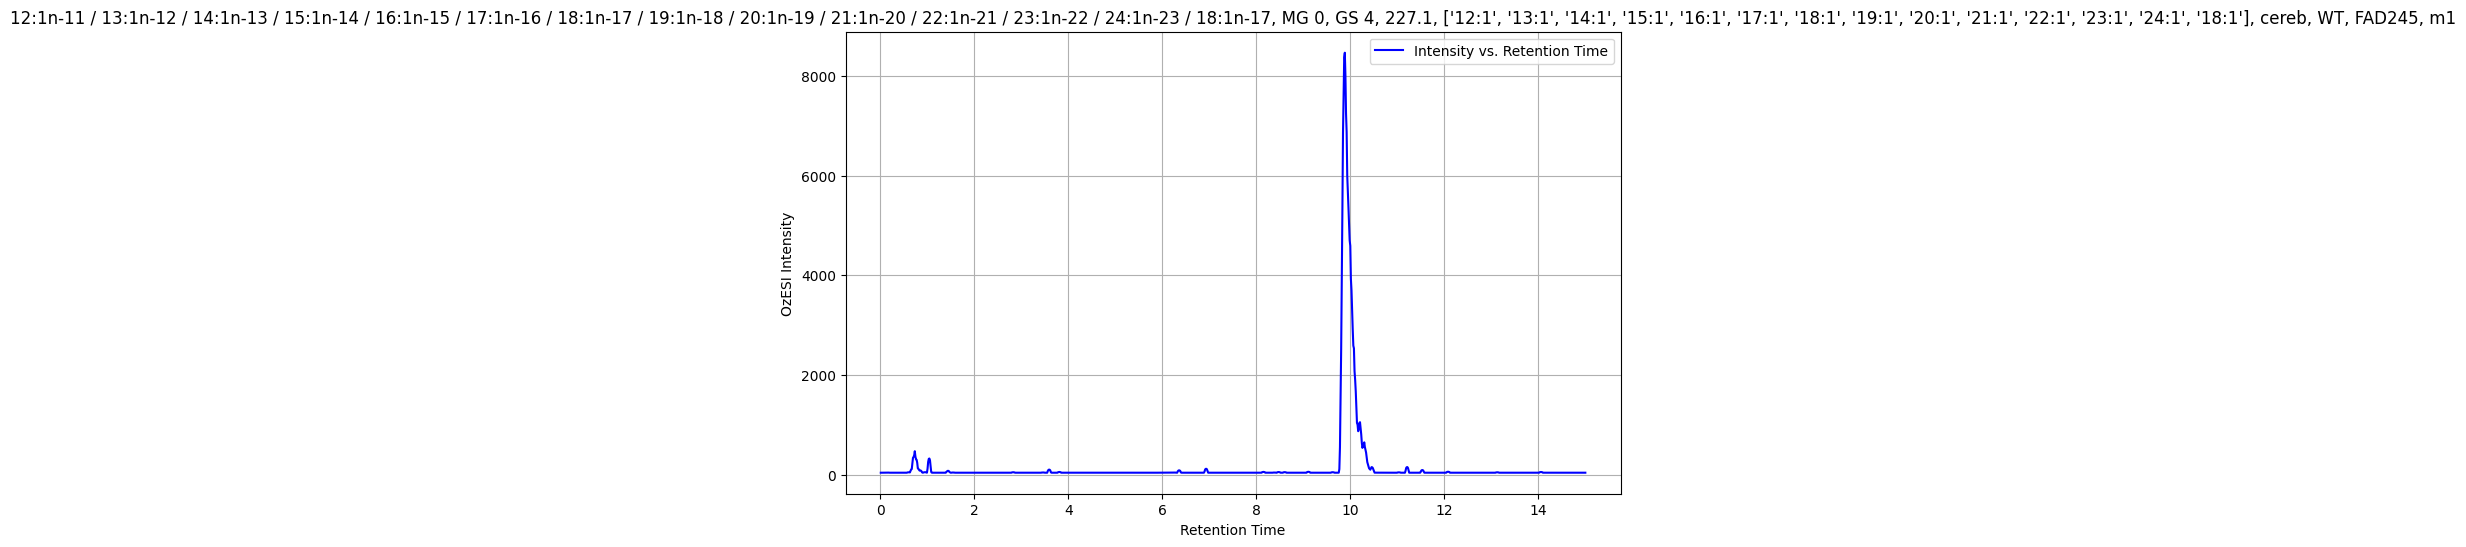

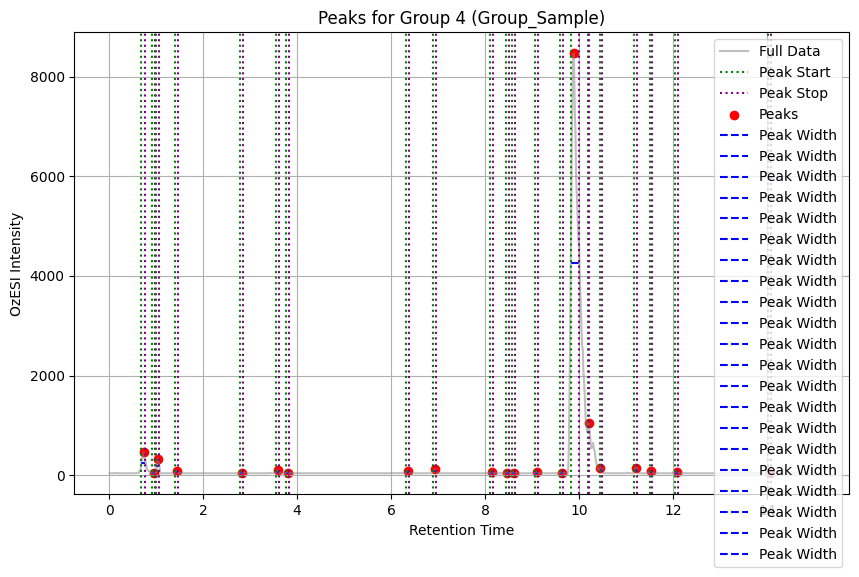

In [82]:
# Plot data and peaks for a specific group
peak_analysis.plot_data_and_peaks(raw_data_csv_hard, peak_analysis_csv,group_type='Group_Sample', group_value=4, height=50, width=2, rel_height=0.5)

In [83]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.153667,44.160004,0,4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,WT,FAD245,m1,44.160004,0.060550,0.064600,2.852736
1,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.321633,41.280003,0,4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,WT,FAD245,m1,41.280003,0.025800,0.025833,1.066400
2,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.463767,41.420002,0,4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,WT,FAD245,m1,41.420002,0.045149,0.038750,1.605025
3,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.489600,41.420002,0,4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,WT,FAD245,m1,41.420002,0.045149,0.038750,1.605025
4,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.605900,49.780003,0,4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,WT,FAD245,m1,49.780003,0.033237,0.038767,1.929805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,24:1,14.263750,41.420002,53,49,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5,183.0,['24:1'],cereb,WT,FAD245,m1,41.420002,0.043056,0.038767,1.605715
5925,24:1,14.457550,41.460003,53,49,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5,183.0,['24:1'],cereb,WT,FAD245,m1,41.460003,0.090415,0.077517,3.213841
5926,24:1,14.586750,41.480003,53,49,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5,183.0,['24:1'],cereb,WT,FAD245,m1,41.480003,0.069427,0.064600,2.679608
5927,24:1,14.741800,41.400002,53,49,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5,183.0,['24:1'],cereb,WT,FAD245,m1,41.400002,0.041979,0.038767,1.604940


# Read in files on the fly - move to matchin lipid part later

In [84]:
import os
import pandas as pd
import re

def load_lipid_data(lipid_list, directory):
    lipid_dict = {}
    lipid_set = set(lipid_list)
    
    # Regular expression pattern to match filenames
    pattern = re.compile(r"FA\((\d+_\d+)\)_OzON_Database\.csv")
    
    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            lipid = match.group(1).replace('_', ':')
            if lipid in lipid_set:
                filepath = os.path.join(directory, filename)
                df = pd.read_csv(filepath)
                lipid_dict[lipid] = df
                
    return lipid_dict

# Example usage
lipid_list = ['14:1', '16:1', '17:1', '18:1', '18:2', '18:3', '20:5']
directory = 'lipid_database/OzON_FA_Database_split/'  # Replace with your directory path

lipid_data = load_lipid_data(lipid_list, directory)

# Check the resulting dictionary
for lipid, df in lipid_data.items():
    print(f"{lipid}: DataFrame with shape {df.shape}")


14:1: DataFrame with shape (1, 19)
18:3: DataFrame with shape (3, 23)
18:1: DataFrame with shape (1, 23)
16:1: DataFrame with shape (1, 21)
18:2: DataFrame with shape (2, 23)
17:1: DataFrame with shape (1, 22)
20:5: DataFrame with shape (5, 25)
